## Assignment 3.1: Logistic Regression - Heart Disease dataset

This assignment aims at familiarizing you with the use of Logistic Regression model supported by scikit-learn. You will have to do:

**3.1.1. Coding Tasks**:** The following questions involve writing code to complete specific tasks.  
    3.1.1.1 *(1 point)* Analyze the dataset using libraries like Pandas and atplotlib.  
    3.1.1.2 *(0.5 point)* Preprocess the data to prepare for modeling.  
    3.1.1.3 *(0.5 point)* Divide the data into training and test sets with a suitable ratio (e.g., 80/20) to ensure unbiased model evaluation.  
    3.1.1.4 *(0.5 point)* Train a Logistic Regression model on the training set.    
    3.1.1.5 *(0.5 point)* Evaluate the model performance on the test set using the following metrics: precision, recall, f1 score, and print out the confusion matrix.  

**3.1.2. Open discussion questions**:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    3.1.2.1 *(1 point)* Is there a relationship between age and the likelihood of heart disease in this dataset? Can you explore this for different age groups?  
    3.1.2.2 *(1 point)* How do vital signs like blood pressure and cholesterol levels compare between patients with and without heart disease?  
    3.1.2.3 *(1 point)* Does having high fasting blood sugar appear to be a risk factor for heart disease according to this dataset?
    3.1.2.4 *(1 point)* Considering all the features, what features do you think might be the most important in predicting heart disease based on this dataset?  

The dataset you will be working on is 'heart-disease.csv'. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, etc. This dataset is to predict, based on the given attributes of a patient, whether that particular person has a heart disease or not.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_path = '/content/drive/MyDrive/heart-disease.csv'
df = pd.read_csv(csv_path)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


### Data features: {-}

* age: The person’s age in years
* sex: The person’s sex (1 = male, 0 = female)
* cp: chest pain type
  * Value 0: asymptomatic
  * Value 1: atypical angina
  * Value 2: non-anginal pain
  * Value 3: typical angina
* trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
* chol: The person’s cholesterol measurement in mg/dl (mg/dl: milligrams per decilitre)
* fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) (Fasting blood glucose: A test to determine how much glucose (sugar) is in a blood sample after an overnight without eating).
* restecg: resting electrocardiographic results
  * Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
  * Value 1: normal
  * Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* thalach: The person’s maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)
* slope: the slope of the peak exercise ST segment
  * 0: downsloping
  * 1: flat
  * 2: upsloping
* ca: The number of major vessels (values in 0–3)
* thal: A blood disorder called thalassemia
  * Value 0: NULL (dropped from the dataset previously
  * Value 1: fixed defect (no blood flow in some part of the heart)
  * Value 2: normal blood flow
  * Value 3: reversible defect (a blood flow is observed but it is not normal)
  
### Data label: {-}

* target: Heart disease (1 = no, 0= yes)

## 3.1.1. Coding tasks

In [ ]:
# Your code goes here.
# 3.1.1.1
print("Statistics of numerical values \n")
print(df.describe())
print()
print("Statistics of numerical and categorial values \n")
print(df.describe(include=[object, float]))

Statistics of numerical values 

              age         sex          cp    trestbps        chol         fbs  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean    54.007901    0.683973    1.005643  132.117381  247.497743    0.168172   
std      9.126292    0.465186    1.024542   16.807511   47.209995    0.374230   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  212.000000    0.000000   
50%     54.000000    1.000000    1.000000  130.000000  245.000000    0.000000   
75%     60.000000    1.000000    2.000000  140.000000  274.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean     0.495485  149.492099    0.310384    1.083296    1.424379    0.7144

In [ ]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Check data types
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


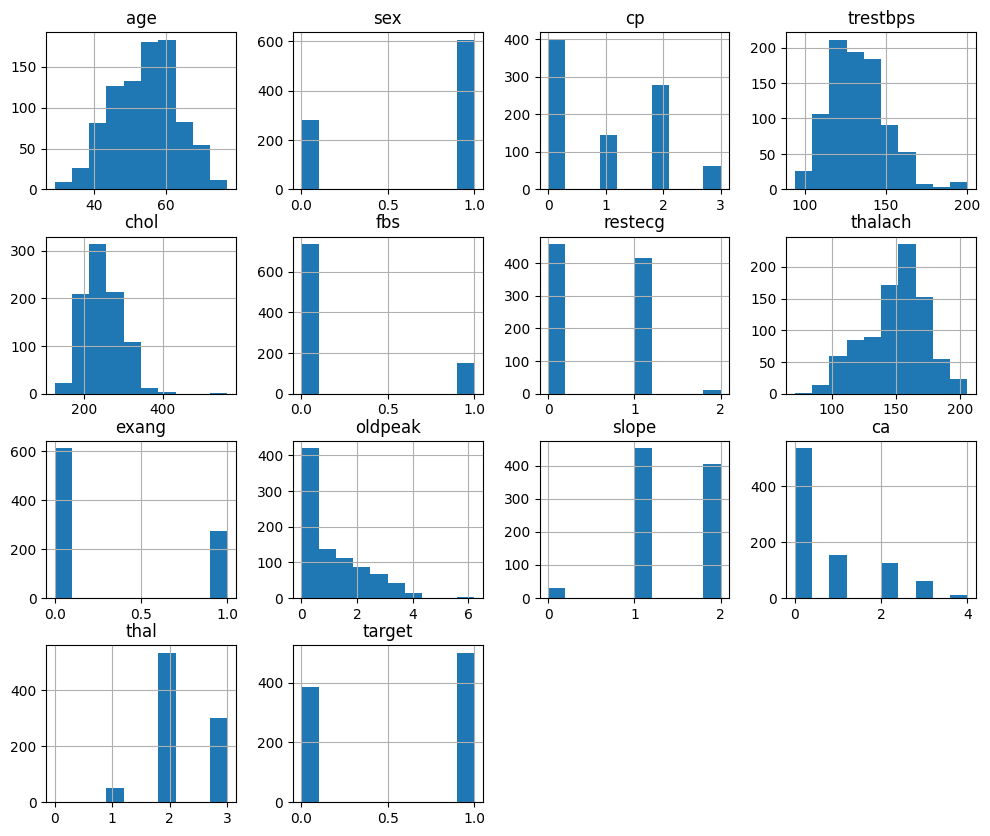

In [ ]:
# Plot histograms of each feature
df.hist(figsize=(12, 10))
plt.show()

In [ ]:
# Your code goes here.
# 3.1.1.2
df = df.dropna()  # Or use imputation if needed

# Separate features and target
X = df.drop('target', axis=1)  # 'target' is the column for heart disease diagnosis
y = df['target']

In [ ]:
# Your code goes here.
# 3.1.1.3
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train: " + str(X_train.shape))
print("y_train: " + str(y_train.shape))
print("X_test: " + str(X_test.shape))
print("y_test: " + str(y_test.shape))

X_train: (708, 13)
y_train: (708,)
X_test: (178, 13)
y_test: (178,)


In [ ]:
from sklearn.preprocessing import StandardScaler     # Import function to perform Standardization
scaler = StandardScaler()                            # Initialize the StandardScaler
X_train_scaler = scaler.fit_transform(X_train)       # Fit (compute mean and std), then transform training data using these values.
X_test_scaler = scaler.transform(X_test)

In [ ]:
# Your code goes here.
# 3.1.1.4
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()                      # Initialize Logistic Regression model
logmodel.fit(X_train_scaler, y_train)


LogisticRegression()

In [ ]:
logmodel.score(X_test_scaler, y_test)

0.9606741573033708

In [ ]:
# Your code goes here.
# 3.1.1.5
# Make predictions on the test set
predictions = logmodel.predict(X_test_scaler)                # Predict labels for X_test_scaler
final_prediction = pd.DataFrame({'target':predictions})      # Import labels to a dataframe
print(final_prediction)

     target
0         1
1         0
2         0
3         0
4         1
..      ...
173       1
174       0
175       1
176       1
177       0

[178 rows x 1 columns]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Precision: ", precision_score(logmodel.predict(X_test_scaler), y_test))
print("Recall: ", recall_score(logmodel.predict(X_test_scaler), y_test))
print("F1: ", f1_score(logmodel.predict(X_test_scaler), y_test))
print("Confusion matrix: \n", confusion_matrix(logmodel.predict(X_test_scaler), y_test))
print("Classification report: \n", classification_report(logmodel.predict(X_test_scaler), y_test))

Precision:  0.9716981132075472
Recall:  0.9626168224299065
F1:  0.9671361502347418
Confusion matrix: 
 [[ 68   3]
 [  4 103]]
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.97      0.96      0.97       107

    accuracy                           0.96       178
   macro avg       0.96      0.96      0.96       178
weighted avg       0.96      0.96      0.96       178



## 3.1.2. Open discussion questions

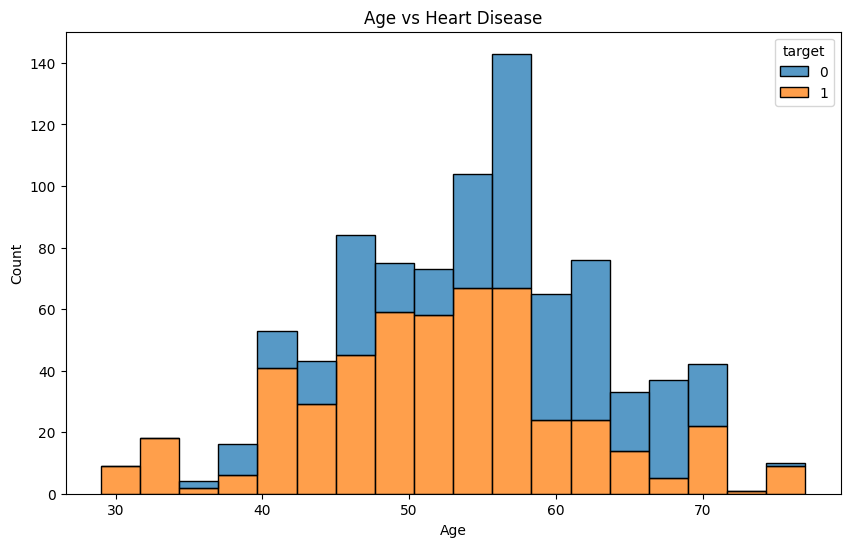

In [ ]:
# Your argument goes here
# 3.1.2.1
# Explore the relationship between age and target (heart disease)
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', multiple='stack')
plt.title('Age vs Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Younger Ages (under 40): There are relatively few individuals in this age range, with most cases showing a higher proportion of heart disease (orange) compared to those without.

Middle Ages (40-55): There is a higher number of individuals in this age group, with a more balanced distribution of people with and without heart disease. However, heart disease cases (orange) appear to be prominent, especially around ages 45-55.

Older Ages (55-70): This age range has more cases without heart disease (blue), especially after age 55. However, there is still a significant number of cases with heart disease, showing that older age is associated with a higher incidence of both outcomes.

Senior Ages (70+): There are fewer cases overall in this age range, but a higher proportion are without heart disease, suggesting possible survivorship bias where healthier individuals live longer.

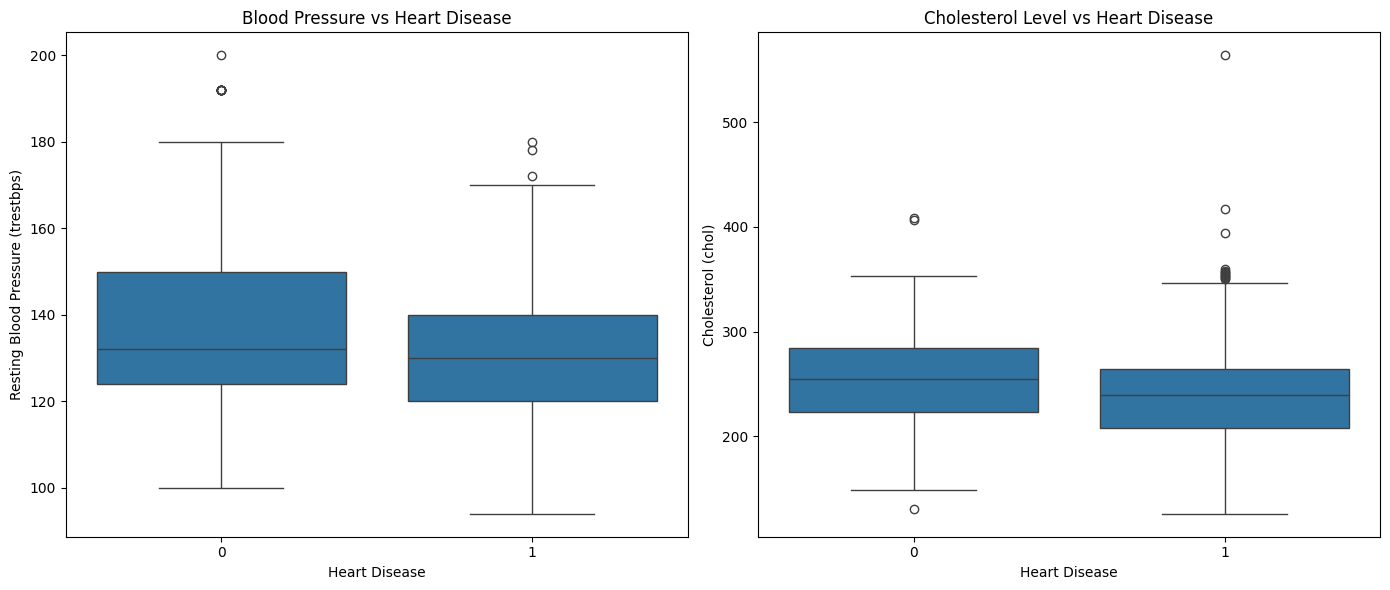

In [ ]:
# Your argument goes here
# 3.1.2.2
# Compare blood pressure and cholesterol levels between patients with and without heart disease
plt.figure(figsize=(14, 6))

# Blood Pressure
plt.subplot(1, 2, 1)
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('Blood Pressure vs Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure (trestbps)')

# Cholesterol
plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Level vs Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol (chol)')

plt.tight_layout()
plt.show()


The median blood pressure appears to be similar for both groups (with and without heart disease).

There is a slight difference in the spread of blood pressure values, with a wider interquartile range (IQR) for those without heart disease (target = 0) compared to those with heart disease (target = 1).

A few outliers (values above 180 mmHg) exist in both groups, but the main range lies between 120 and 160 mmHg for both groups.

The median cholesterol level also appears similar for both groups.

The cholesterol values have a wider range for individuals without heart disease (target = 0), with outliers going beyond 400 mg/dL.

There are fewer outliers in the heart disease group (target = 1), with most cholesterol levels below 350 mg/dL.

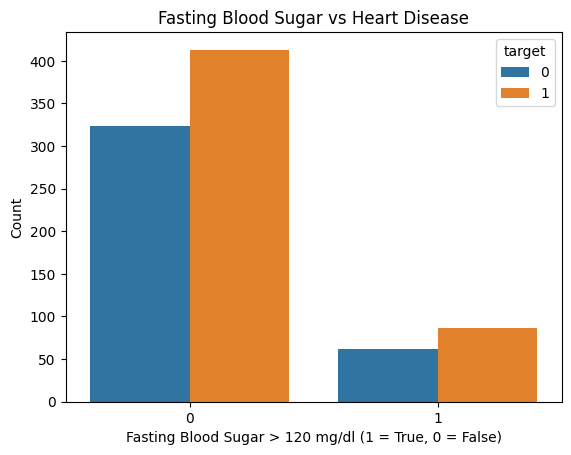

In [ ]:
# Your argument goes here
# 3.1.2.3
# Analyze the relationship between fasting blood sugar and heart disease
sns.countplot(data=df, x='fbs', hue='target')
plt.title('Fasting Blood Sugar vs Heart Disease')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = True, 0 = False)')
plt.ylabel('Count')
plt.show()

- Fasting Blood Sugar ≤ 120 mg/dL (0):
Most individuals with fasting blood sugar levels at or below 120 mg/dL (represented by 0) are split between those with and without heart disease.
The orange bar (indicating those with heart disease) is slightly taller than the blue bar, suggesting a higher proportion of individuals with heart disease in this category.

- Fasting Blood Sugar > 120 mg/dL (1):
There are fewer individuals overall with fasting blood sugar levels greater than 120 mg/dL (represented by 1).
Interestingly, among this group, the number of people with heart disease (orange) is also slightly higher than those without (blue), though both counts are relatively low.

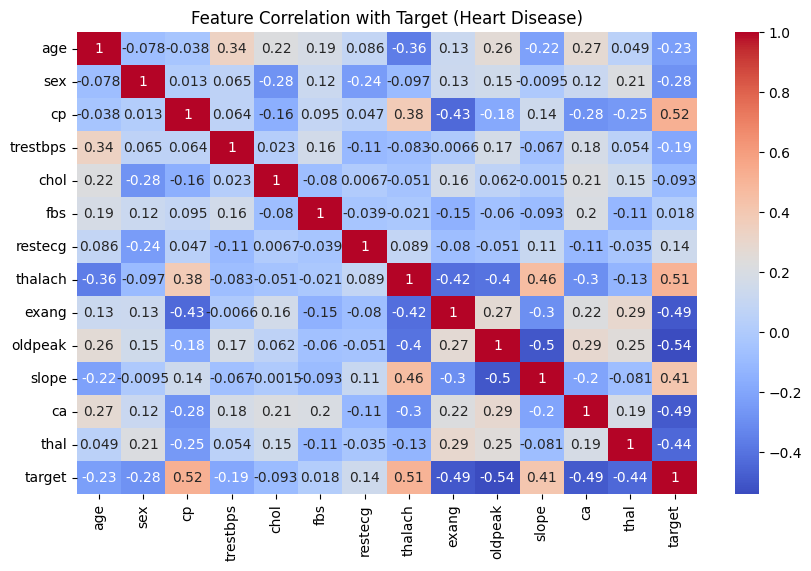

target      1.000000
cp          0.520575
thalach     0.512224
slope       0.412311
restecg     0.143819
fbs         0.017736
chol       -0.093199
trestbps   -0.194818
age        -0.232576
sex        -0.283901
thal       -0.443080
ca         -0.489730
exang      -0.492947
oldpeak    -0.540943
Name: target, dtype: float64


In [ ]:
# Your argument goes here
# 3.1.2.4
# Use correlation matrix to find important features
correlation = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Target (Heart Disease)')
plt.show()

# Print correlation with target
print(correlation['target'].sort_values(ascending=False))


1) Positive Correlations with Heart Disease (Target):

- cp (Chest Pain Type): This has a relatively strong positive correlation of 0.52 with heart disease, indicating that individuals with certain types of chest pain are more likely to have heart disease.

- thalach (Maximum Heart Rate Achieved): With a correlation of 0.42, a higher heart rate achieved tends to be associated with heart disease.

- slope (Slope of the Peak Exercise ST Segment): Shows a positive correlation of 0.41 with the target, indicating that specific slope types may be linked to heart disease.

2) Negative Correlations with Heart Disease (Target):

- exang (Exercise Induced Angina): A correlation of -0.49 suggests that individuals with exercise-induced angina are less likely to have heart disease.

- oldpeak (ST Depression Induced by Exercise): With a correlation of -0.54, a higher value of ST depression is associated with a lower likelihood of heart disease.

- ca (Number of Major Vessels Colored by Fluoroscopy): This has a correlation of -0.46 with heart disease, suggesting fewer major vessels visible with fluoroscopy might be linked with a higher likelihood of heart disease.

- thal (Thalassemia): With a correlation of -0.44, specific thalassemia values are associated with a lower likelihood of heart disease.

## Assignment 3.2 *(3 points)*: Logistic Regression - CIFAR 10 SMALL dataset

This example demonstrates how to build a logistic regression model to recognize objects in CIFAR 10 dataset.

In this assignment, you will have to:
- 3.2.1 (Done) Load the dataset.
- 3.2.2 *(1 point)* Preprocess and normalize the images.
- 3.2.3 *(1 point)* Construct, train, and evaluate a multinomial logistic regression model for CIFAR 10 SMALL image classification.
- 3.2.4 *(1 point)* Assess the model’s performance on the test set. Keep in mind that low accuracy is acceptable due to the complexity of the data and the limited capacity of logistic regression.

The dataset you will be working on is CIFAR 10 SMALL (https://www.openml.org/d/40926) which consists of 20,000 32x32 colour images in 10 classes, with 2,000 images per class. There are 14,000 training images and 6,000 test images. Here follows the ten object classes:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Here follows some data samples in the dataset:

![alt text](https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png)

In [ ]:
# Import necessary libraries
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Load the CIFAR 10 SMALL dataset from openml
# OpenML is an open platform for sharing datasets, algorithms, and experiments
cifar_10_small = fetch_openml('cifar_10_small', version=1, parser='auto')

In [ ]:
# Separate data into features X and labels y, then convert to numpy arrays
X = cifar_10_small['data'].to_numpy()
y = cifar_10_small['target'].to_numpy()

print("Feature shape: " + str(X.shape))
print("Label shape: " + str(y.shape))

class_names = [
    'airplane',   # Label: 0
    'automobile', # Label: 1
    'bird',       # Label: 2
    'cat',        # Label: 3
    'deer',       # Label: 4
    'dog',        # Label: 5
    'frog',       # Label: 6
    'horse',      # Label: 7
    'ship',       # Label: 8
    'truck'       # Label: 9
]

Feature shape: (20000, 3072)
Label shape: (20000,)


Label: dog


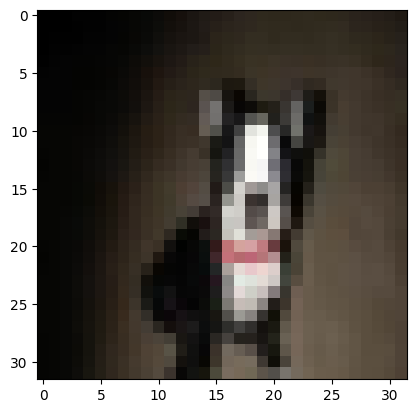

In [ ]:
# Print a sample of the dataset
print("Label: " + class_names[int(y[198])])
plt.imshow(X[198].reshape(3,32,32).transpose([1,2,0])) # The nature of the data requires this restructuring.

Label: automobile


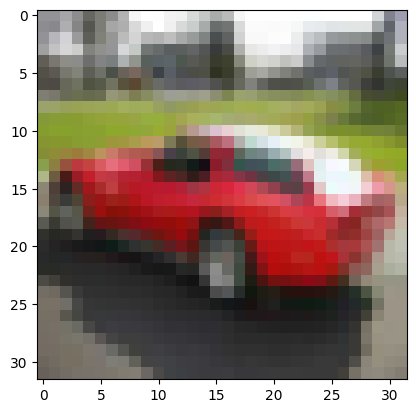

In [ ]:
# Print a sample of the dataset
print("Label: " + class_names[int(y[255])])
plt.imshow(X[255].reshape(3,32,32).transpose([1,2,0])) # The nature of the data requires this restructure.

In [ ]:
# Split the dataset into training and testing sets (using 70% for training and 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [ ]:
# Your code goes here.
# 3.2.2
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Your code goes here.
# 3.2.3
# Initialize the Logistic Regression model with multinomial option
logmodel = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=100)  # Using 'saga' for large datasets

# Train the model on the training data
logmodel.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logmodel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Your code goes here.
# 3.2.4
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy on Test Set:", accuracy)

# Optional: You can also show a classification report for detailed metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))


Model Accuracy on Test Set: 0.37733333333333335
              precision    recall  f1-score   support

    airplane       0.44      0.50      0.47       572
  automobile       0.43      0.42      0.42       580
        bird       0.25      0.23      0.24       606
         cat       0.25      0.23      0.24       621
        deer       0.33      0.29      0.31       638
         dog       0.27      0.31      0.29       534
        frog       0.41      0.43      0.42       627
       horse       0.43      0.43      0.43       614
        ship       0.47      0.52      0.49       598
       truck       0.47      0.43      0.45       610

    accuracy                           0.38      6000
   macro avg       0.37      0.38      0.38      6000
weighted avg       0.38      0.38      0.38      6000



With an overall accuracy from 37% to 44%, this is relatively low, which is expected due to the limitations of logistic regression for complex image data like CIFAR-10. CIFAR-10 is a challenging dataset due to its high-dimensional nature and the visual complexity of the images, which is difficult for a simple logistic regression model to handle effectively.